Program Assignment 1 Machine Learning

Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.

We are given a dataset of student grades originating from different schools. The data collected ranges from the gender and age of the student to their frequency of absences alongside their grades. As most of the data is continuous, we will use regression to solve our problem of _______________________.

In [366]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


### Load Dataset

In [367]:
url = "https://raw.githubusercontent.com/HansJoachimW/AFL1-MachineLearning/main/Student%20Grade%20-%20Dataset.csv"
dataset = pd.read_csv(url)
dataset.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
273,GP,M,17,R,GT3,T,1,2,at_home,at_home,...,3,5,2,2,2,1,2,15,14,14
41,GP,M,15,U,LE3,T,4,4,teacher,other,...,5,4,3,2,4,5,8,12,12,12
304,GP,M,19,U,GT3,T,3,3,other,other,...,4,4,4,1,1,3,20,15,14,13
329,GP,F,17,U,GT3,T,4,4,teacher,teacher,...,4,3,3,1,2,4,4,14,14,14
272,GP,F,18,U,LE3,T,1,1,other,other,...,4,4,3,1,1,3,2,11,11,11
180,GP,M,16,U,GT3,T,4,3,teacher,other,...,3,4,3,2,3,3,10,9,8,8
166,GP,M,16,U,GT3,T,2,2,other,other,...,4,3,5,2,4,4,4,10,10,10
233,GP,M,16,U,GT3,T,4,4,health,other,...,4,2,4,2,4,1,2,14,13,13
37,GP,M,16,R,GT3,A,4,4,other,teacher,...,2,4,3,1,1,5,7,15,16,15
341,GP,M,18,U,GT3,T,4,4,teacher,services,...,4,3,3,2,2,2,0,10,10,0


### Preprocessing Data

In [368]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['school'] = le.fit_transform(dataset['school'].values)
dataset['sex'] = le.fit_transform(dataset['sex'].values)
dataset['address'] = le.fit_transform(dataset['address'].values)
dataset['famsize'] = le.fit_transform(dataset['famsize'].values)
dataset['Pstatus'] = le.fit_transform(dataset['Pstatus'].values)
dataset['Mjob'] = le.fit_transform(dataset['Mjob'].values)
dataset['Fjob'] = le.fit_transform(dataset['Fjob'].values)
dataset['reason'] = le.fit_transform(dataset['reason'].values)
dataset['guardian'] = le.fit_transform(dataset['guardian'].values)
dataset['schoolsup'] = le.fit_transform(dataset['schoolsup'].values)
dataset['famsup'] = le.fit_transform(dataset['famsup'].values)
dataset['paid'] = le.fit_transform(dataset['paid'].values)
dataset['activities'] = le.fit_transform(dataset['activities'].values)
dataset['nursery'] = le.fit_transform(dataset['nursery'].values)
dataset['higher'] = le.fit_transform(dataset['higher'].values)
dataset['internet'] = le.fit_transform(dataset['internet'].values)
dataset['romantic'] = le.fit_transform(dataset['romantic'].values)

dataset.head(n=10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,14,15,15


### Checking NaN Data

In [369]:
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Exploratory Data Analysis (Univariate)

Display the Univariate Data Characteristics

In [370]:
dataset.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Display Graphical Univariate EDA using box plot to analyze data distribution

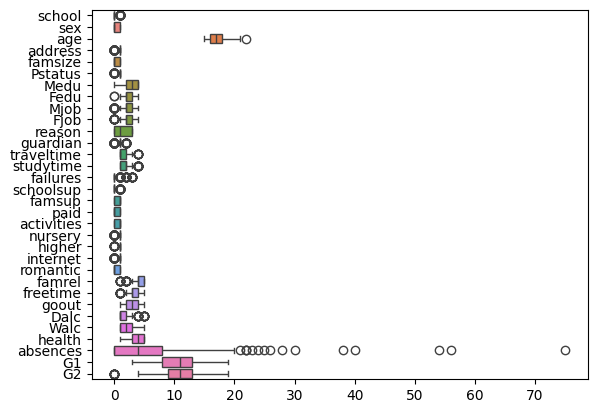

In [371]:
sns.boxplot(data=dataset.drop(columns=['G3']), orient='h')
plt.show()

Display a separate boxplot for 'G3'

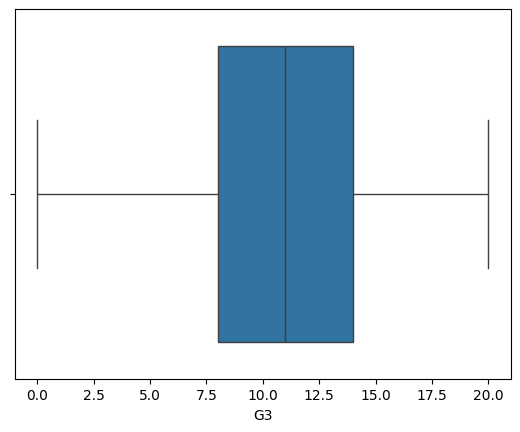

In [372]:
sns.boxplot(data=dataset["G3"],orient="h")
plt.xlabel('G3')
plt.show()

### Exploratory Data Analysis (Multivariate)

Display the Multivariate EDA using pair plot

In [373]:
# sns.pairplot(data=dataset, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
# plt.show()

Display the correlation strength and direction using heatmap

In [374]:
# plt.subplots(figsize=(17,15))
# sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
# plt.show()

### Deciding The Independent And Dependent Variable

In [375]:
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

### Split The Dataset To Training Data dan Test Data
Train test split is a model validation process that allows you to simulate how your model would perform with new data.

In [376]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [377]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Create The Regression Model Based On The Training Data

In [378]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


print("Intercept: {:0.4f}".format(regressor.intercept_))
print("Coefficient b1: {:0.4f}".format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))
print("Coefficient b4: {:0.4f}".format(regressor.coef_[3]))
print("Coefficient b5: {:0.4f}".format(regressor.coef_[4]))
print("Coefficient b6: {:0.4f}".format(regressor.coef_[5]))
print("Coefficient b7: {:0.4f}".format(regressor.coef_[6]))
print("Coefficient b8: {:0.4f}".format(regressor.coef_[7]))
print("Coefficient b9: {:0.4f}".format(regressor.coef_[8]))
print("Coefficient b10: {:0.4f}".format(regressor.coef_[9]))
print("Coefficient b11: {:0.4f}".format(regressor.coef_[10]))
print("Coefficient b12: {:0.4f}".format(regressor.coef_[11]))
print("Coefficient b13: {:0.4f}".format(regressor.coef_[12]))
print("Coefficient b14: {:0.4f}".format(regressor.coef_[13]))
print("Coefficient b15: {:0.4f}".format(regressor.coef_[14]))
print("Coefficient b16: {:0.4f}".format(regressor.coef_[15]))
print("Coefficient b17: {:0.4f}".format(regressor.coef_[16]))
print("Coefficient b18: {:0.4f}".format(regressor.coef_[17]))
print("Coefficient b19: {:0.4f}".format(regressor.coef_[18]))
print("Coefficient b20: {:0.4f}".format(regressor.coef_[19]))
print("Coefficient b21: {:0.4f}".format(regressor.coef_[20]))
print("Coefficient b22: {:0.4f}".format(regressor.coef_[21]))
print("Coefficient b23: {:0.4f}".format(regressor.coef_[22]))
print("Coefficient b24: {:0.4f}".format(regressor.coef_[23]))
print("Coefficient b25: {:0.4f}".format(regressor.coef_[24]))
print("Coefficient b26: {:0.4f}".format(regressor.coef_[25]))
print("Coefficient b27: {:0.4f}".format(regressor.coef_[26]))
print("Coefficient b28: {:0.4f}".format(regressor.coef_[27]))
print("Coefficient b29: {:0.4f}".format(regressor.coef_[28]))
print("Coefficient b30: {:0.4f}".format(regressor.coef_[29]))
print("Coefficient b31: {:0.4f}".format(regressor.coef_[30]))
print("Coefficient b32: {:0.4f}".format(regressor.coef_[31]))

print('\nRegression Equation: y= {:0.4f} X1 + {:0.4f} X2 + {:0.4f} X3 + {:0.4f} X4 + {:0.4f} X5 + {:0.4f} X6 + {:0.4f} X7 + {:0.4f} X8 + {:0.4f} X9 + {:0.4f} X10 + {:0.4f} X11 + {:0.4f} X12 + {:0.4f} X13 + {:0.4f} X14 + {:0.4f} X15 + {:0.4f} X16 + {:0.4f} X17 + {:0.4f} X18 + {:0.4f} X19 + {:0.4f} X20 + {:0.4f} X21 + {:0.4f} X22 + {:0.4f} X23 + {:0.4f} X24 + {:0.4f} X25 + {:0.4f} X26 + {:0.4f} X27 + {:0.4f} X28 + {:0.4f} X29 + {:0.4f} X30 + {:0.4f} X31 + {:0.4f} X32'
      .format(regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4], regressor.coef_[5], regressor.coef_[6], regressor.coef_[7], regressor.coef_[8], regressor.coef_[9], regressor.coef_[10], regressor.coef_[11], regressor.coef_[12], regressor.coef_[13], regressor.coef_[14], regressor.coef_[15], regressor.coef_[16], regressor.coef_[17], regressor.coef_[18], regressor.coef_[19], regressor.coef_[20], regressor.coef_[21], regressor.coef_[22], regressor.coef_[23], regressor.coef_[24], regressor.coef_[25], regressor.coef_[26], regressor.coef_[27], regressor.coef_[28], regressor.coef_[29], regressor.coef_[30], regressor.coef_[31], regressor.intercept_))

r_square = regressor.score(X_train, y_train)
print('\nThe Coefficient of Determination: {:0.4f}'.format(r_square))

Intercept: 10.4747
Coefficient b1: 0.2049
Coefficient b2: 0.1036
Coefficient b3: -0.3307
Coefficient b4: 0.0136
Coefficient b5: 0.0857
Coefficient b6: -0.0347
Coefficient b7: 0.1938
Coefficient b8: -0.2280
Coefficient b9: -0.0200
Coefficient b10: 0.0452
Coefficient b11: -0.0231
Coefficient b12: -0.0077
Coefficient b13: 0.0252
Coefficient b14: 0.0255
Coefficient b15: -0.1478
Coefficient b16: 0.1992
Coefficient b17: 0.0464
Coefficient b18: 0.1057
Coefficient b19: -0.1765
Coefficient b20: -0.1268
Coefficient b21: 0.0404
Coefficient b22: -0.1032
Coefficient b23: -0.1333
Coefficient b24: 0.2167
Coefficient b25: -0.0237
Coefficient b26: 0.0048
Coefficient b27: -0.1701
Coefficient b28: 0.1710
Coefficient b29: 0.1612
Coefficient b30: 0.4659
Coefficient b31: 0.4538
Coefficient b32: 3.5714

Regression Equation: y= 0.2049 X1 + 0.1036 X2 + -0.3307 X3 + 0.0136 X4 + 0.0857 X5 + -0.0347 X6 + 0.1938 X7 + -0.2280 X8 + -0.0200 X9 + 0.0452 X10 + -0.0231 X11 + -0.0077 X12 + 0.0252 X13 + 0.0255 X14 + -0.14

### Test The Predicted Value Using Test Data

In [379]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
0,14,14.243208
1,10,10.675614
2,9,9.151399
3,15,15.251887
4,16,16.491889


### Evaluating the Model Fit using RMSE

In [380]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2.3760
MAE: 1.55
MSE: 5.65


Visualize the comparison between y_test and y_pred to depict the error margin

In [381]:
# evaluate.plot(kind='line')
# plt.title('Comparison between y_test and y_pred', pad=20)
# plt.tight_layout()
# plt.show()

# Polynomial Regression

In [382]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

## 2 Degree

### Training Process

Get coefficients and intercepts for the Two Degree Polynomial Regression

In [383]:
# Two Degree Polynomial
poly = PolynomialFeatures(degree = 2)
train_x_poly2 = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
train_y_poly2 = clf.fit(train_x_poly2, y_train)

# Get coefficients and intercepts
print('Coefficients:', clf.coef_)
print('Intercepts:', clf.intercept_)


Coefficients: [-3.82302576e-04  3.75129740e-02  3.41227209e-02 -3.63755264e-01
  4.42124143e-02  8.10395346e-03 -5.40170762e-03  3.58285977e-01
 -1.00765832e-02 -1.51992942e-01  9.99785775e-02 -2.14454042e-01
 -2.88443562e-01 -6.07685555e-02 -1.51622968e-02 -3.13765029e-01
  2.08969153e-02 -1.52615773e-01  1.26496783e-01 -2.30429719e-01
 -6.29734467e-02  8.44814415e-03  4.91573855e-03 -4.03635911e-02
  1.81236816e-01 -1.45817245e-01  7.47820215e-02 -1.66704542e-01
  8.13868853e-02  4.41416987e-02  5.01919434e-01  1.16061010e+00
  1.57805865e+00  6.93568740e-02 -3.51451265e-02  1.76866437e-01
  2.39541827e-01 -6.58260305e-02  9.27564803e-02  2.17861193e-01
 -3.25722503e-02 -4.52534802e-02  2.13201590e-02  1.07283210e-01
  2.42961979e-01  2.08734830e-02 -1.32651589e-01 -5.65912458e-02
 -2.89194085e-02 -6.23035058e-02  6.22588676e-02  1.93332528e-01
  6.46293017e-02 -1.69879264e-01 -7.12318405e-02 -8.65590413e-02
 -1.08568548e-01 -2.89260019e-02  1.39449375e-01 -2.89949874e-02
  1.6278284

### Test Model

Find RMSE, MAR, and MSE using the Model

In [384]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Two Degree Model
test_x_poly2 = poly.fit_transform(X_test)
test_y_poly2 = clf.predict(test_x_poly2)

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(test_y_poly2, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(test_y_poly2, y_pred))
print('MSE: %.2f' % mean_squared_error(test_y_poly2, y_pred))

Root Mean Squared Error (RMSE): 4.7690
MAE: 3.02
MSE: 22.74


## 3 Degree

### Training Process

Get coefficients and intercepts for the Three Degree Polynomial Regression

In [385]:
# Three Degree Polynomial
poly = PolynomialFeatures(degree = 3)
train_x_poly3 = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
train_y_poly3 = clf.fit(train_x_poly3, y_train)

# Get coefficients and intercepts
print('coeficients', clf.coef_)
print('intercept', clf.intercept_)

coeficients [2.33978448e-05 3.28948357e-03 1.10651700e-02 ... 5.66761201e-02
 6.59958025e-02 1.05935834e-01]
intercept 10.256510754541068


### Test Model

In [386]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Three Degree Model
test_x_poly3 = poly.fit_transform(X_test)
test_y_poly3 = clf.predict(test_x_poly3)

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(test_y_poly3, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(test_y_poly3, y_pred))
print('MSE: %.2f' % mean_squared_error(test_y_poly3, y_pred))

Root Mean Squared Error (RMSE): 1.5172
MAE: 1.22
MSE: 2.30


# Support Vector Regression

In [387]:
from sklearn.svm import SVR
# Create a Support Vector Regression Model
regressor = SVR(kernel = 'rbf')

# Fit the Model into the Data
regressor.fit(X_train, y_train)

SVR()

In [388]:
# Predict the Response for a New Data Point
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
0,14,13.624840
1,10,11.673982
2,9,9.598154
3,15,14.515231
4,16,15.891043


In [389]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 3.5329
MAE: 2.28
MSE: 12.48


# Decision Tree Regression

In [390]:
from sklearn.tree import DecisionTreeRegressor
 
# Create a Decision Tree Regression Model
model = DecisionTreeRegressor()
 
# Fit the Model into the Data
model.fit(X_train, y_train)
 
# Predict the Response for a New Data Point
y_pred = model.predict(X_test)

In [391]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2.6241
MAE: 1.37
MSE: 6.89


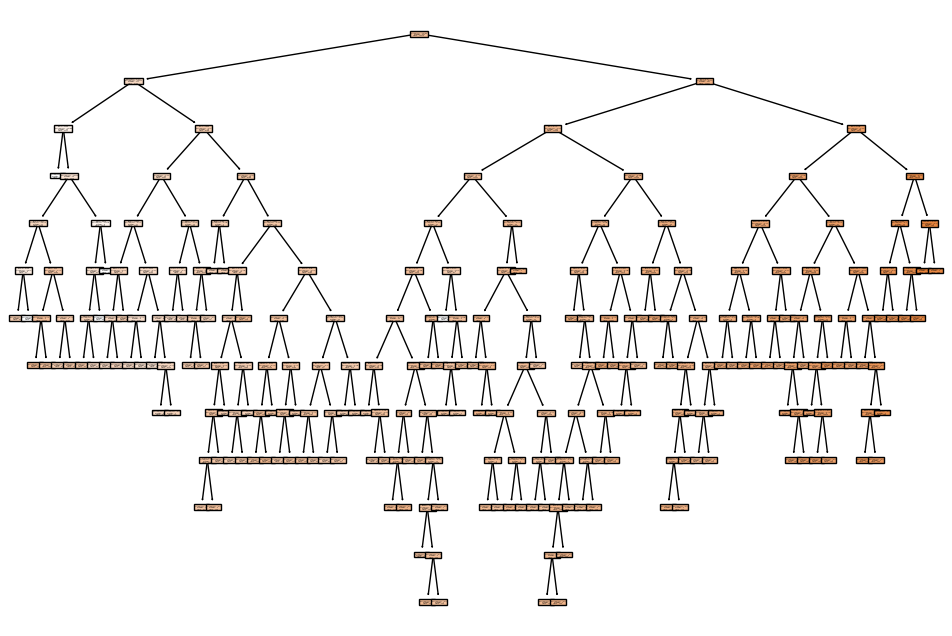

In [392]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=dataset.columns.tolist())
plt.show()

In [393]:
# import graphviz
# from sklearn.tree import export_graphviz
# dot_data = export_graphviz(model, out_file=None, 
#                                 feature_names=dataset.iloc[:, :-1].columns.values.tolist(),
#                                 class_names=dataset.iloc[:, -1].unique(),
#                                 filled=True,
#                                 rounded=True,  
#                                 special_characters=True)  
# graph = graphviz.Source(dot_data) 
# graph 

# Random Forest Regression

In [394]:
from sklearn.ensemble import RandomForestRegressor
 
# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100)
 
# Fit the Model into the Data
model.fit(X_train, y_train)
 
# Predict the Response for a New Data Point
y_pred = model.predict(X_test)

In [395]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.8366
MAE: 1.11
MSE: 3.37


Calculate OOB Score

In [396]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(oob_score=True)

# Fit the Model into the Data
RandomForest.fit(X_train,y_train)
print("OOB Score:", RandomForest.oob_score_)

OOB Score: 0.8732629546033713


K-NN Classifier

We use GridSearchCV to find the best k.

In [397]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# GridSearchCV assesses how well the model generalizes to unseen data for different hyperparameter settings

param_grid = {'n_neighbors': range(1, 21)} 

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors (Grid Search): {best_n_neighbors}")

C:\Users\hansj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best n_neighbors (Grid Search): 20


In [398]:
classifier = KNeighborsClassifier(n_neighbors = 50, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head()

,y_test,y_pred
0,14,15
1,10,11
2,9,11
3,15,14
4,16,15


In [399]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 4.0985
MAE: 2.85
MSE: 16.80
